# Machine Learning

*Екатерина Лобачева / Илья Щуров / Сергей Сметанин *

*Совместный бакалавриат НИУ ВШЭ и РЭШ, 2016-17 учебный год*

[Страница курса](http://math-info.hse.ru/2016-17/Machine_Learning)

## Семинар 2: градиентный спуск и линейная регрессия
### Градиентный спуск
Пусть имеется гладкая числовая функция от нескольких аргументов 
$$\begin{align}
f\colon& \mathbb R^n \to \mathbb R\\
f\colon& x \mapsto f(x), \quad x=(x_1, \ldots, x_n) \in \mathbb R^n
\end{align}$$
и мы хотим численно найти её минимум. Известно, что *вектор градиента*, то есть вектор $\frac{\partial f(x)}{\partial x}=\left(\frac{\partial f(x)}{\partial x_1}, \ldots, \frac{\partial f(x)}{\partial x_n}\right)$, компонентами которого являются частные производные функции $f$ по каждой переменной, показывает направление локально наискорейшего подъема. Противоположный вектор (он называется *антиградиентом*) показывает направление локально наискорейшего спуска. Метод градиентного спуска использует именно эту идею и устроен следующим образом. Возьмём какую-нибудь стартовую точку $x^0$ (здесь верхний индекс $0$ — это именно индекс, а не степень). Найдём антиградиент $f$ в точке $x^0$. «Спустимся» от точки $x^0$ вдоль вектора антиградиента на какое-то расстояние. Получим новую точку $x^1$. Будем повторять операцию много раз. Иными словами, мы построим последовательность $\{x^k\}_{k=0}^\infty$ следующим образом:

$$x_{k+1} = x_k - \eta_k \frac{\partial f(x)}{\partial x}$$

Здесь последовательность $\{\eta_k\}_{k=1}^{\infty}$ задаёт величину шага вдоль вектора градиента. Для простоты будем пока считать, что $\eta_k = \eta$ для всех $k$, и $\eta$ — достаточно маленькое положительное число. Разумно ожидать, что пределом последовательности $\{x_k\}$ будет минимум функции $f$.

### Игрушечный пример
Рассмотрим простейший пример: пусть $n = 1$ и $f(x) = x^2$. Тогда $\frac{\partial f}{\partial x}=2x$. Возьмём какое-нибуь $x^0$ и построим последовательность $\{x_k\}$:

$$\begin{align}
x^1 & = x^0 - 2 \eta x^0  = x^0 (1 - 2\eta) \\
x^2 & = x^1 - 2 \eta x^1  = x^1 (1 - 2\eta) = x^0 (1-2\eta)^2 \\
&\vdots \\
x^k &= x^0 (1-2\eta)^k
\end{align}$$

На каждом шаге предыдущее число умножается на $(1-2\eta)$. Если $0<\eta<1$, $|1-2\eta|<1$ и $\lim_{x^k} = 0$. То есть градиентный спуск действительно сходится к точке минимума. Насколько быстро это происходит?

Возьмём логарифм ошибки на $k$-м шаге:

$$\log (|x^k - 0|) = \log(|x^0(1-2\eta)^k|) = k\log(|1-2\eta|)+O(1),$$

где $\log(|1-2\eta|)<0$. Эта функция линейно убывает по $k$, поэтому говорят, что скорость сходимости *линейная*.

Заметим, что в зависимости от $\eta$ бывают следующие режимы поведения $x^k$:

1. $0 < \eta < 1/2$: $x^k$ монотонно убывает, сохраняя знак;
2. $\eta = 1/2$: первой же итерацией попадаем в точку минимума и дальше вечно живём в ней;
3. $1/2 < \eta < 1$: $x^k$ на каждом шагу перескакивает через точку $0$, но с ростом $k$ приближается к нулю.
4. $\eta = 1$: бесконечно перескакиваем с $x^0$ на $-x^0$ и наоборот, не приближаясь к нулю.
5. $\eta > 1$: бесконечно перескакиваем через ноль, отдаляясь от него.

Мы рассмотрели самый простой пример, который только возможен, но в более общем случае при выполнении некоторых дополнительных условий и если стартовая точка $x^0$ достаточно близка к минимуму, $\eta$ достаточно мало, поведение будет аналогичным.

### Реализация
Реализуем градиентный спуск для простого двумерно примера.

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import norm
%matplotlib inline

Рассмотрим функцию $f(x, y)=x^2 + 10 y^2$. Её градиент равен $\frac{\partial f(x, y)}{\partial(x, y)}=(2x, 20y)$.

In [24]:
def f(u):
    return u[0] ** 2 + 10 * u[1] ** 2
def Df(u):
    return np.array([2*u[0], 20 * u[1]])

In [25]:
def gradient_descent_simple(f, Df, eta=0.01, steps=20000, initial_point=(-3, 3), 
                            precision=1e-10, xmin=-4, xmax=4, ymin=-3, 
                            ymax=3, allpoints=False):
    u_prev = np.array(initial_point)


    X = np.linspace(xmin, xmax, 100)
    Y = np.linspace(ymin, ymax, 100)
    plt.figure(figsize=(6, 6))
    plt.contour(X, Y, [[f(np.array([x, y])) for x in X] for y in Y], 100)
    # нарисуем линии уровня функции $f$

    points = []
    for i in range(steps):
        points.append(u_prev)
        u_new = u_prev - eta * Df(u_prev)

        if norm(u_new - u_prev) < precision:
            break
        # прекратить, если новая точка достаточно близка к старой

        u_prev = u_new


    plt.plot([p[0] for p in points], [p[1] for p in points]
             , 'o-')
    if allpoints:
        return points
    return points[-1]

array([ -4.94792403e-09,   2.95255661e-97])

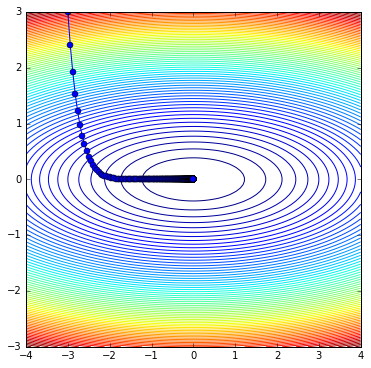

In [26]:
gradient_descent_simple(f=f, Df=Df)

Если взять слишком большую $\eta$, сходимости может и не быть:

array([ -9.88131292e-324,  -3.00000000e+000])

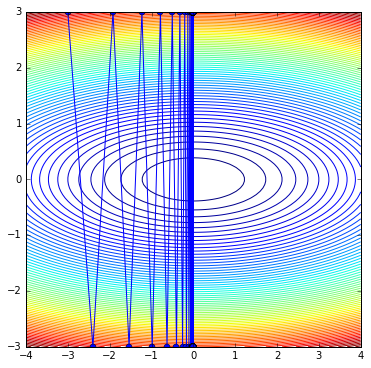

In [27]:
gradient_descent_simple(f=f, Df=Df, eta=0.1)

А если слишком $\eta$ слишком маленькая, то мы можем не дойти до минимума.

array([-2.99988001,  2.9988003 ])

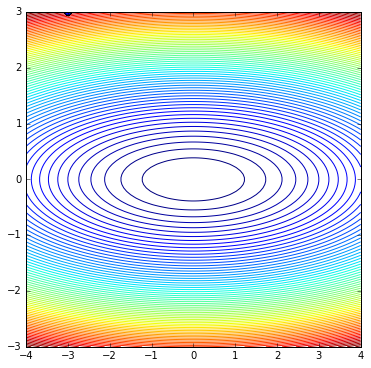

In [29]:
gradient_descent_simple(f=f, Df=Df, eta=1e-9)

Рассмотрим функцию посложнее — возьмём так называемую [функцию Розенброка](https://ru.wikipedia.org/wiki/Функция_Розенброка).

In [30]:
def rosenbock(u):
    return ((1 - u[0]) ** 2
            + 100 * (u[1] - u[0] ** 2) ** 2)
def Drosenbrock(u):
    return (np.array([-2 * (1 - u[0]) 
                      - 100 * 2 * (u[1] - u[0] ** 2) * 2 * u[0], 
                      100 * 2 * (u[1] - u[0] ** 2)]))

array([-0.40888058,  0.17412667])

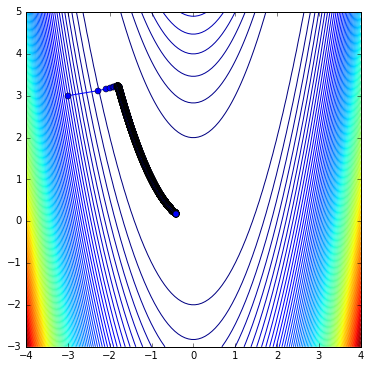

In [31]:
gradient_descent_simple(f=rosenbock, Df=Drosenbrock, initial_point=(-3, 3), 
                        eta=0.0001, ymax=5)

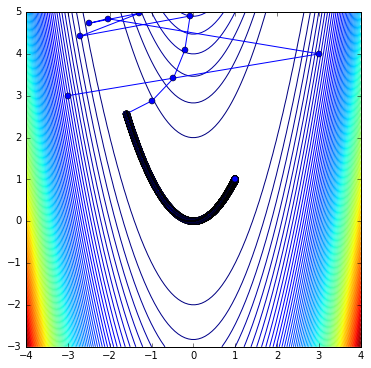

In [32]:
points = gradient_descent_simple(f=rosenbock, Df=Drosenbrock, 
                                 initial_point=(-3, 3), eta=0.001 / 1.2, 
                                 ymax=5, allpoints=True)

Нарисуем красивую трёхмерную картинку с помощью plotly.

In [10]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Surface, Scatter3d

In [11]:
init_notebook_mode()

In [12]:
x, y = np.mgrid[-3:3:100j, -1:6:100j]
iplot([Surface(x=x, y=y, z=f([x, y])),
       Scatter3d(x = [p[0] for p in points],
                 y = [p[1] for p in points],
                 z = [f(p) for p in points], mode = 'line', marker=dict(size=3))])

### Линейная регрессия
Пусть мы хотим предсказывать переменную $y$ по значениям $m$ числовых признаков $x_1, \ldots, x_m$. Пусть обучающая выборка состоит из $n$ наблюдений. Имеющиеся данные можно записать в виде матрицы, каждая строка которой будет соответствовать одному наблюдению, а каждый столбец — одной переменной (всего будет $n$ строк и $m$ столбцов). Обозначим эту матрицу через $X=(x_i^j)$: верхним индексом будем обозначать номер наблюдения, а нижним — номер переменной, $i=1, \ldots, m$, $j=1,\ldots, n$. Обозначим $n$-мерный вектор ответов через $y=(y^1,\ldots, y^n)$.

В задаче линейной регрессии мы предполагаем, что ответ является линейной функцией от данных, то есть

$$y = w_1 x_1 + \ldots + w_m x_m = \langle x, w\rangle,$$

где угловыми скобками обозначается стандартное скалярное произведение, $w=(w_1, \ldots, w_m)$ — вектор весов. *Обучение* модели состоит в нахождении «хорошего» вектора весов, для которого отклонения предсказываемого моделью значения $y$ от настоящего будет «маленьким». Что конкретно подразумевается под малостью отклонения зависит от выбранного метода. 

Распространенным способом обучения линейной регрессионной модели является метод наименьших квадратов. При использовании этого метода минимизируется *квадратичная функция потерь*:

$$Q(w) = \sum_{j=1}^n Q_j(w) = \sum_{j=1}^n ( \langle x^j, w\rangle - y^j)^2$$

Можно представить $Q(w)$ в матричной форме, которую мы будем часто использовать. В матричной форме все векторы рассматриваются по умолчанию как вектор-столбцы; для получения вектор-строки нужно применять операцию транспонирования. Например скалярное произведение произвольных векторов $a=(a_1, \ldots, a_k)$ и $b = (b_1, \ldots, b_k)$ записывается в виде $a^T b$ (здесь $b$ — вектор-столбец, $a$ — вектор-строка). Нетрудно видеть, что вектор предсказанных ответов вычисляется как $Xw$:

$$
\begin{pmatrix}
x_1^1 & x_2^1 & \ldots & x_m^1 \\
x_1^2 & x_2^2 & \ldots & x_m^2 \\
\vdots & \vdots & \vdots & \vdots \\
x_1^n & x_2^n & \ldots & x_m^n
\end{pmatrix}
\begin{pmatrix}
w_1 \\
w_2 \\
\vdots \\
w_m
\end{pmatrix}
=
\begin{pmatrix}
x_1^1 w_1 + x_2^1 w_2 + \ldots + x_m^1 w_m \\
x_1^2 w_1 + x_2^2 w_2 + \ldots + x_m^2 w_m \\
\vdots
x_1^n w_1 + x_2^n w_2 + \ldots + x_m^n w_m \\
\end{pmatrix}
$$
Вектор ошибок вычисляется как $Xw-y$. Квадратичная функция потерь $Q(w)$ записывается в виде

$$Q(w) = \|Xw-y\|^2 = \langle Xw-y, Xw-y \rangle = (Xw-y)^T (Xw-y).$$

Чтобы применить градиентный спуск к функции $Q$ нужно посчитать её градиент. Для этого мы докажем несколько вспомогательных утверждений о градиентах функций, записанных в матричном виде. Содержательно в них нет ничего особо сложного, но если вы раньше не сталкивались с таким формализмом, может потребоваться некоторое время, чтобы к нему привыкнуть. Самый правильный способ состоит в том, чтобы вывести эти доказательства самостоятельно.

### Вспомогательные утверждения
**Утверждение 1.** Пусть $a = (a_1, \ldots, a_m)$ — некоторый фиксированный вектор. Рассмотрим функцию $L(w) = \langle a, w \rangle = a^T w$. Её градиент равен вектору $a$. Иными словами,

$$\frac{\partial (a^T w)}{\partial w}=a.$$

Заметим, что в левую часть $a$ входит в виде вектор-строки, а в правую — в виде вектор-столбца.

Доказательство этого утверждения очень простое и мы оставим в качестве упражнения.

**Замечание.** Если какое-то матричное выражение в конечном итоге является числом, то есть матрицей $1×1$, то транспонирование этого выражения не меняет его. Например, $(a^T w)^T = w^T a = \langle a, w\rangle$. Используя этот факт и утвреждение 1 легко видеть, что 

$$\frac{\partial  (w^T a)}{\partial w} = a.$$

**Утверждение 2.** Пусть $A=(a_{ij})$ — некоторая квадратная матрица $m×m$. Рассмотрим функцию $B(w) = \langle Aw, w\rangle = w^T A w$. Тогда 

$$\frac{\partial (w^T Aw)}{\partial w} = (A + A^T) w$$

**Доказательство.** 
Видимо, самый надёжный способ состоит в том, чтобы честно расписать всё в координатах. Итак,

$$B(w) = \sum_{i, j =1}^{m} a_{ij} w_i w_j.$$

Найдём $k$-ю компоненту вектора градиента. При дифференцировании правой части этого равенства по $w_k$ выживают только слагаемые, содержащие $w_k$ в качестве хотя бы одного из сомножителей. Существует два способа получить такой сомножитель: либо положить $i=k$, либо положить $j=k$, при $i=j=k$ подпадает под оба случая. Имеем:

$$\frac{\partial B(w)}{\partial w_k} = \frac{\partial B(w)}{\partial w_k} \sum_{j=1}^m a_{kj}w_k w_j + \frac{\partial B(w)}{\partial w_k} \sum_{i=1, i\ne k}^m a_{ik}w_i w_k.$$

Во втором слагаемом нам пришлось исключить случай $i=k$, поскольку $a_{kk} w_k w_k$ уже включено в первое слагаемое. Впрочем, через мгновение мы избавимся от этой асимметрии. Очевидно, для всех $j\ne k$, 

$$\frac{\partial B(w)}{\partial w_k} a_{kj}w_k w_j = a_{kj} w_j.$$

Аналогично для всех $i \ne k$,

$$\frac{\partial B(w)}{\partial w_k} a_{ik}w_i w_k = a_{ik} w_i.$$

Рассмотрим случай $i=j=k$ отдельно:

$$\frac{\partial B(w)}{\partial w_k} a_{kk}w_k w_k = 2 a_{kk} w_k = a_{kk} w_k + a_{kk} w_k.$$

Теперь можно записать

$$\frac{\partial B(w)}{\partial w_k} = \sum_{j=1}^m a_{kj} w_j + \sum_{i=1}^m a_{ik}w_i.$$

Одно из слагаемых $a_{kk} w_k$ попало в первую сумму, второе во вторую, восстановив таким образом красивую симметричную запись.

Мы нашли $k$-ю компоненту вектора градиента. Весь вектор градиента записывается таким образом:

$$\frac{\partial B(w)}{\partial w} = 
\begin{pmatrix}
\sum_{j=1}^m a_{1j} w_j\\
\sum_{j=1}^m a_{2j} w_j\\
\vdots\\
\sum_{j=1}^m a_{mj} w_j
\end{pmatrix}
+
\begin{pmatrix}
\sum_{i=1}^m a_{i1}w_i \\
\sum_{i=1}^m a_{i2}w_i \\
\vdots\\
\sum_{i=1}^m a_{im}w_i \\
\end{pmatrix}.
$$

Вглядываясь в получающиеся вектора, можно заметить, что первый вектор равен $Aw$, а второй $A^T w$ (нужно внимательно посмотреть, какие индексы меняются при суммировании). Что и требовалось.

### Градиент квадратичной функции потерь
Запишем $Q(w)$ в следующем виде:

$$Q(w) = \|Xw-y\|^2 = (Xw-y)^T (Xw-y) = (Xw)^T Xw - y^T Xw - (Xw)^T y + y^T y = w^T X^T X w - y^T Xw - w^T X^T y.$$

Заметим, что $y^T Xw=(y^T Xw)^T = w^T X^T y$ (мы опять использовали тот факт, что число не меняется при транспонировании). Таким образом,

$$Q(w) = w^T X^T X w - 2 y^T X w.$$

При этом $X^T X$ — симметричная матрица (попробуйте её транспонировать!). Теперь воспользуемся ранее доказанными утверждениями для нахождения градиента $Q$. Имеем:

$$\frac{\partial Q(w)}{\partial w} = 2 X^T X w - 2 (y^T X)^T = 2 X^T X w - 2 X^T y.$$

Для обработки первого слагаемого мы воспользовались утверждением 2 (подставив $A=X^T X$ и воспользовавшись тем, что $A^T = A$), а для обработки второго — утверждением 1 (подставив $a = y^T X$).

Теперь всё готово к тому, чтобы применить метод градиентного спуска к функции $Q$. Для простоты визуализации результата рассмотрим простейшую парную линейную регрессию.

$$y = kx + b, \quad w=(k, b)$$

Сгенерируемых каких-нибудь данных.

In [13]:
from numpy.random import normal

In [14]:
n = 100
x = normal(size=n)
y = 2 * x + 3 + normal(size=n)

Здесь было сгенерировано 100 нормально $x$'ов, взятых из стандартного нормального распределения, a $y$ вычислялись так: честная линейная функция плюс шум (также взятый из стандартного нормального распределения).

Поскольку наша регрессия имеет свободный член, к матрице $X$ нужно приписать столбец, состоящий из одних единиц. В данном случае мы использовали функцию `np.ones_like()`, генерирующую объект с такими же измерениями, как и его аргумент, заполненный единицами. В данном случае мы попросили сделать вектор такой же длины, как $x$, но заполненный единицами. `np.array` в данном случае создаёт матрицу из списка списков, считая, что она записана по строкам; чтобы её записать по столбцам, мы применили транспонирование.

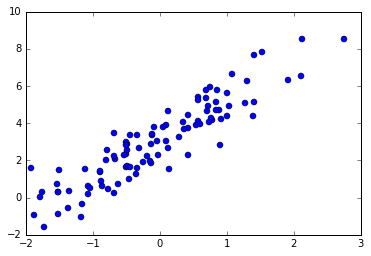

In [15]:
# посмотрим, что у нас за данные
plt.plot(x, y, 'o')

Запишем теперь матрицу $X$.

In [16]:
X = np.array([x, np.ones_like(x)]).T

Поскольку наша регрессия имеет свободный член, к матрице $X$ нужно приписать столбец, состоящий из одних единиц. В данном случае мы использовали функцию `np.ones_like()`, генерирующую объект с такими же измерениями, как и его аргумент, заполненный единицами. Иными словами, мы попросили сделать вектор такой же длины, как $x$, но заполненный единицами. `np.array` в данном случае создаёт матрицу из списка списков, считая, что она записана по строкам; чтобы её записать по столбцам, мы применили транспонирование.

Запишем квадратичную функцию потерь и её градиент.

In [33]:
def Q(w):
    S = X @ w - y
    return S.T @ S

In [34]:
def DQ(w):
    return 2 * (X.T @ X @ w - X.T @ y)

array([ 2.01941909,  3.10024721])

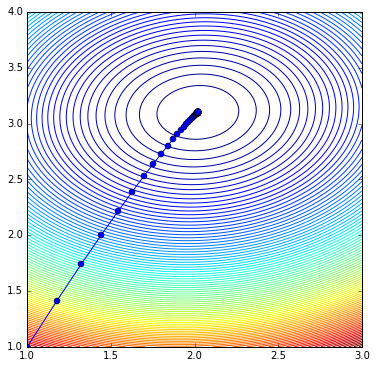

In [35]:
gradient_descent_simple(f=Q, Df=DQ, xmin=1, xmax=3, ymin=1, ymax=4, 
                        initial_point=(1, 1), eta=0.001)

Как видим, получается результат, похожий на настоящие значения $k$ и $b$.